In [1]:
#
# Import Libraries
#

import pickle
from dotmap import DotMap
import os
import numpy as np
import pandas as pd
import sys
from functools import reduce
import glob

import plotly.graph_objects as go
from plotly.subplots import make_subplots


utilsPath = r'S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\utils'
if utilsPath not in sys.path:
    sys.path.append(utilsPath)

from MyCorrelations import Xsplit, MyCorrelations
from pvalues_correlations import getH0, plotNullAlt, get_pvalues, graph_size, get_corrThr, adjust_pvalues

In [2]:
#
# Set constants
#

Qworking_path = r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Proteomics\ALDH4"
Mworking_path = r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Metabolomics\ALDH4"

# X
xq_path = os.path.join(Qworking_path, "WorkingFiles", "Xq_minus_X_norm.tsv")
mq_path = os.path.join(Mworking_path, "WorkingFiles", "Xm_norm.tsv")

# Feature info
q2i_path = os.path.join(Qworking_path, "WorkingFiles", "q2info.tsv")
m2i_path = os.path.join(Mworking_path, "WorkingFiles", "m2info.tsv")

# Fitlered features
qfilt_path = r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Analysis\00-FeatureSelection\ALDH4\qfilt.tsv"
mfilt_path = r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Analysis\00-FeatureSelection\ALDH4\mfilt.tsv"

# metadata
mdata_path = os.path.join(r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Metadata\ALDH4\WorkingFiles\main_metadata.tsv")

# RPath
Rengine = r"C:\Program Files\R\R-4.1.2\bin\Rscript.exe"
rPath = r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Analysis\02-Correlations\ALDH4\myRData"

In [3]:
#
# Read data
#

xq_all = pd.read_csv(xq_path, sep='\t', index_col=0)
xm_all = pd.read_csv(mq_path, sep='\t', index_col=0)

#q2i = pd.read_csv(q2i_path, sep='\t')
#m2i = pd.read_csv(m2i_path, sep='\t')

qfilt = pd.read_csv(qfilt_path, sep='\t', index_col=0)
mfilt = pd.read_csv(mfilt_path, sep='\t', index_col=0)

mdata = pd.read_csv(mdata_path, sep='\t', index_col=0)

In [4]:
# Filter features

xq = xq_all[qfilt.index]
xm = xm_all[mfilt.index]

In [5]:
mdata_a12_pbs = mdata[np.isin(mdata.Group, ['A12', 'PBS'])]
mdata_a12_b18 = mdata[np.isin(mdata.Group, ['A12', 'B1-8'])]
mdata_b18_pbs = mdata[np.isin(mdata.Group, ['B1-8', 'PBS'])]

In [6]:
ctype_omic = {
    'psk': ['qq', 'mm', 'qm'],
    'pc': ['qq', 'mm'],
    'rpc': ['qq', 'mm'],
    'cca': ['qm'],
    'rcca': ['qm']
}

In [7]:
#
# Calculate correlations  
#

corr = {}

for mdata_i,j in zip(
    [mdata_a12_pbs, mdata_a12_b18, mdata_b18_pbs], 
    [('A12','PBS'), ('A12', 'B1-8'), ('B1-8', 'PBS')]
):
    name = j[0]+'_'+j[1]

    xq_i = xq[np.isin(xq.index, mdata_i.index)]
    xm_i = xm[np.isin(xm.index, mdata_i.index)]

    corr[name] = MyCorrelations(xq_i, xm_i, mdata_i, factor='Group', c=j[1], d=j[0])
    corr[name].PSK(methods=['pearson', 'spearman'])
    corr[name].gLasso(test=False)
    corr[name].PartialCorrelation()
    corr[name].rCCA(rPath, Rengine=Rengine)
    corr[name].CCA()

Start PSK
End PSK | 0.77s
Start gLasso
omic: qq
ss: a


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   56.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  56s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   41.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  98s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  181s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   52.5s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  234s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   27.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  27s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   25.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  53s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   28.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  82s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   36.3s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  119s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   28.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  28s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   33.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  62s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  130s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  199s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


omic: mm
ss: a


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   39.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  39s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   41.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  80s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  148s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  227s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   34.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  35s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   26.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  61s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  131s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.0min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  191s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
C:\Users\fitae\AppData\Roaming\Python\Python39\site-packages\sklearn\covariance\_graph_lasso.py:316: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -1.158e-03
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


ss: d


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   37.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  38s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   34.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  72s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  145s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.4min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  231s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Omic: qq | Subset: a | Alpha: 0.6906
Omic: qq | Subset: c | Alpha: 1.027
Omic: qq | Subset: d | Alpha: 1.2511
Omic: mm | Subset: a | Alpha: 0.9537
Omic: mm | Subset: c | Alpha: 1.3461
Omic: mm | Subset: d | Alpha: 1.3829
End gLasso | 1400.69s
Start Partial Correlation


S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\utils\MyCorrelations.py:139: RuntimeWarning: invalid value encountered in sqrt
  Mpc = -Mpr/np.sqrt(np.outer(


End Partial Correlation | 8.41s
Start rCCA
** Start script
Loading required package: MASS
Loading required package: lattice
Loading required package: ggplot2

Loaded mixOmics 6.18.1
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  citation('mixOmics')

Warning message:
package 'ggplot2' was built under R version 4.1.3 
** Reading qq table
** Reading mm table
** Applying rCCA
** Calculating equiangular vectors
** qq projection
** mm projection
** Inner product
** Writing output table
** End Script

** Start script
Loading required package: MASS
Loading required package: lattice
Loading required package: ggplot2

Loaded mixOmics 6.18.1
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  cit

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   30.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  30s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   36.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  66s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  148s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  223s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   35.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  35s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   24.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  59s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   50.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  110s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   45.8s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  156s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   27.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  27s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   29.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  57s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  120s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  187s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


omic: mm
ss: a


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   40.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  40s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   36.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  76s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   43.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  119s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.0min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  182s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   33.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  33s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   27.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  61s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   43.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  104s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   56.9s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  161s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   36.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  36s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   31.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  68s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  137s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  216s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Omic: qq | Subset: a | Alpha: 0.8164
Omic: qq | Subset: c | Alpha: 1.1389
Omic: qq | Subset: d | Alpha: 1.2511
Omic: mm | Subset: a | Alpha: 1.101
Omic: mm | Subset: c | Alpha: 1.3386
Omic: mm | Subset: d | Alpha: 1.3829
End gLasso | 1257.75s
Start Partial Correlation


S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\utils\MyCorrelations.py:139: RuntimeWarning: invalid value encountered in sqrt
  Mpc = -Mpr/np.sqrt(np.outer(


End Partial Correlation | 12.32s
Start rCCA
** Start script
Loading required package: MASS
Loading required package: lattice
Loading required package: ggplot2

Loaded mixOmics 6.18.1
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  citation('mixOmics')

Warning message:
package 'ggplot2' was built under R version 4.1.3 
** Reading qq table
** Reading mm table
** Applying rCCA
** Calculating equiangular vectors
** qq projection
** mm projection
** Inner product
** Writing output table
** End Script

** Start script
Loading required package: MASS
Loading required package: lattice
Loading required package: ggplot2

Loaded mixOmics 6.18.1
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  ci

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   34.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  34s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   33.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  68s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   43.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  111s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   57.9s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  169s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   26.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  26s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   25.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  52s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   27.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  79s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   38.4s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  118s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   34.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  34s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   25.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  59s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   49.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  109s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   44.9s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  154s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


omic: mm
ss: a


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   36.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  36s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   32.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  69s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  141s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   50.2s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  192s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
C:\Users\fitae\AppData\Roaming\Python\Python39\site-packages\sklearn\covariance\_graph_lasso.py:316: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 2.295e-04
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


ss: c


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   31.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  31s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   24.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  56s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  123s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.0min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  185s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
C:\Users\fitae\AppData\Roaming\Python\Python39\site-packages\sklearn\covariance\_graph_lasso.py:316: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -1.158e-03
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


ss: d


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   33.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  33s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   27.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  61s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   42.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  104s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   53.1s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  157s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Omic: qq | Subset: a | Alpha: 0.8516
Omic: qq | Subset: c | Alpha: 1.027
Omic: qq | Subset: d | Alpha: 1.1389
Omic: mm | Subset: a | Alpha: 0.7529
Omic: mm | Subset: c | Alpha: 1.3461
Omic: mm | Subset: d | Alpha: 1.3386
End gLasso | 1270.1s
Start Partial Correlation
End Partial Correlation | 11.68s
Start rCCA
** Start script
Loading required package: MASS
Loading required package: lattice
Loading required package: ggplot2

Loaded mixOmics 6.18.1
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  citation('mixOmics')

Warning message:
package 'ggplot2' was built under R version 4.1.3 
** Reading qq table
** Reading mm table
** Applying rCCA
** Calculating equiangular vectors
** qq projection
** mm projection
** Inner product
** Writing output table
** End Script

** Start script
Loading required package: MASS
Loading required package: la

In [8]:
#
# Calculate Null Hypothesis Correlations
#

n = 3

corrSL = {}

for mdata_i,j in zip(
    [mdata_a12_pbs, mdata_a12_b18, mdata_b18_pbs], 
    [('A12','PBS'), ('A12', 'B1-8'), ('B1-8', 'PBS')]
):

    name = j[0]+'_'+j[1]
    corrSL[name] = []

    for xqsi in range(n):

        xqs = xq.copy()
        xms = xm.copy()

        _ = [np.random.shuffle(i) for i in xqs.to_numpy().T]
        _ = [np.random.shuffle(i) for i in xms.to_numpy().T]

        corrS = MyCorrelations(xqs, xms, mdata, factor='Group', c=j[1], d=j[0])
        corrS.PSK(methods=['pearson', 'spearman'])
        corrS.gLasso(test=False)
        corrS.PartialCorrelation()
        corrS.rCCA(rPath, Rengine=Rengine)
        corrS.CCA()
        corrSL[name].append(corrS)

Start PSK
End PSK | 0.93s
Start gLasso
omic: qq
ss: a


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  19s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  91s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  177s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  257s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   35.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  35s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   34.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  69s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  148s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.4min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  232s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   28.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  28s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   40.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  69s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  135s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  214s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


omic: mm
ss: a


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  16s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  89s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   45.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  134s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  207s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   30.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  30s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   30.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  60s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  130s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  207s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   24.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  24s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   30.9s finished


[GraphicalLassoCV] Done refinement  2 out of 4:  55s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  125s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  202s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Omic: qq | Subset: a | Alpha: 0.4287
Omic: qq | Subset: c | Alpha: 0.9346
Omic: qq | Subset: d | Alpha: 0.9
Omic: mm | Subset: a | Alpha: 0.55
Omic: mm | Subset: c | Alpha: 1.0468
Omic: mm | Subset: d | Alpha: 1.0549
End gLasso | 1367.74s
Start Partial Correlation


S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\utils\MyCorrelations.py:125: RuntimeWarning: invalid value encountered in sqrt
  Mpc = -Mpr/np.sqrt(np.outer(
S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\utils\MyCorrelations.py:139: RuntimeWarning: invalid value encountered in sqrt
  Mpc = -Mpr/np.sqrt(np.outer(


End Partial Correlation | 6.42s
Start rCCA
** Start script
Loading required package: MASS
Loading required package: lattice
Loading required package: ggplot2

Loaded mixOmics 6.18.1
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  citation('mixOmics')

Warning message:
package 'ggplot2' was built under R version 4.1.3 
** Reading qq table
** Reading mm table
** Applying rCCA
** Calculating equiangular vectors
** qq projection
** mm projection
** Inner product
** Writing output table
** End Script

** Start script
Loading required package: MASS
Loading required package: lattice
Loading required package: ggplot2

Loaded mixOmics 6.18.1
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  cit

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  17s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  92s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  170s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.4min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  253s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   31.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  31s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   30.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  62s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  136s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.4min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  220s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   30.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  30s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   38.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  69s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  138s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.4min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  222s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


omic: mm
ss: a


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  16s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  92s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   51.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  144s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   44.7s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  188s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   29.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  29s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   29.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  58s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  127s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  207s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   25.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  25s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   33.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  58s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  132s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  207s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Omic: qq | Subset: a | Alpha: 0.4345
Omic: qq | Subset: c | Alpha: 0.9722
Omic: qq | Subset: d | Alpha: 0.8949
Omic: mm | Subset: a | Alpha: 0.6275
Omic: mm | Subset: c | Alpha: 1.0847
Omic: mm | Subset: d | Alpha: 1.0274
End gLasso | 1351.92s
Start Partial Correlation


S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\utils\MyCorrelations.py:125: RuntimeWarning: invalid value encountered in sqrt
  Mpc = -Mpr/np.sqrt(np.outer(


End Partial Correlation | 6.36s
Start rCCA
** Start script
Loading required package: MASS
Loading required package: lattice
Loading required package: ggplot2

Loaded mixOmics 6.18.1
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  citation('mixOmics')

Warning message:
package 'ggplot2' was built under R version 4.1.3 
** Reading qq table
** Reading mm table
** Applying rCCA
** Calculating equiangular vectors
** qq projection
** mm projection
** Inner product
** Writing output table
** End Script

** Start script
Loading required package: MASS
Loading required package: lattice
Loading required package: ggplot2

Loaded mixOmics 6.18.1
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  cit

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   24.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  25s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  95s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  166s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  242s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   28.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  28s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   42.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  70s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   46.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  117s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  194s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   27.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  27s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   35.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  62s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  135s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  213s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


omic: mm
ss: a


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  17s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  90s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   52.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  142s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   30.5s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  173s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   26.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  26s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   33.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  59s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  122s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  198s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   25.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  25s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   35.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  61s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  128s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  205s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Omic: qq | Subset: a | Alpha: 0.4158
Omic: qq | Subset: c | Alpha: 1.0861
Omic: qq | Subset: d | Alpha: 0.854
Omic: mm | Subset: a | Alpha: 0.6619
Omic: mm | Subset: c | Alpha: 1.1232
Omic: mm | Subset: d | Alpha: 1.0228
End gLasso | 1273.9s
Start Partial Correlation
End Partial Correlation | 6.35s
Start rCCA
** Start script
Loading required package: MASS
Loading required package: lattice
Loading required package: ggplot2

Loaded mixOmics 6.18.1
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  citation('mixOmics')

Warning message:
package 'ggplot2' was built under R version 4.1.3 
** Reading qq table
** Reading mm table
** Applying rCCA
** Calculating equiangular vectors
** qq projection
** mm projection
** Inner product
** Writing output table
** End Script

** Start script
Loading required package: MASS
Loading required package: lat

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  19s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   49.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  68s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  151s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  231s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   30.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  30s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   29.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  60s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   56.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  116s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  196s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   24.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  24s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   38.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  63s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   59.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  122s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  198s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


omic: mm
ss: a


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   20.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  20s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  92s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   49.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  142s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  206s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   22.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  22s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   33.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  56s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  118s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  194s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   28.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  28s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   33.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  62s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  128s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  203s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Omic: qq | Subset: a | Alpha: 0.4311
Omic: qq | Subset: c | Alpha: 1.0857
Omic: qq | Subset: d | Alpha: 0.9617
Omic: mm | Subset: a | Alpha: 0.5469
Omic: mm | Subset: c | Alpha: 1.079
Omic: mm | Subset: d | Alpha: 1.0947
End gLasso | 1277.11s
Start Partial Correlation


S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\utils\MyCorrelations.py:139: RuntimeWarning: invalid value encountered in sqrt
  Mpc = -Mpr/np.sqrt(np.outer(
S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\utils\MyCorrelations.py:125: RuntimeWarning: invalid value encountered in sqrt
  Mpc = -Mpr/np.sqrt(np.outer(


End Partial Correlation | 6.39s
Start rCCA
** Start script
Loading required package: MASS
Loading required package: lattice
Loading required package: ggplot2

Loaded mixOmics 6.18.1
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  citation('mixOmics')

Warning message:
package 'ggplot2' was built under R version 4.1.3 
** Reading qq table
** Reading mm table
** Applying rCCA
** Calculating equiangular vectors
** qq projection
** mm projection
** Inner product
** Writing output table
** End Script

** Start script
Loading required package: MASS
Loading required package: lattice
Loading required package: ggplot2

Loaded mixOmics 6.18.1
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  cit

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  20s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   57.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  77s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  142s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  220s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   26.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  26s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   32.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  59s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   48.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  107s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  182s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   30.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  30s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   34.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  64s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  133s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  209s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


omic: mm
ss: a


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   24.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  24s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  94s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   48.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  143s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.0min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  205s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   26.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  26s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   32.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  59s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   50.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  109s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  183s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   29.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  30s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   33.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  63s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  130s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  206s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Omic: qq | Subset: a | Alpha: 0.4384
Omic: qq | Subset: c | Alpha: 1.1216
Omic: qq | Subset: d | Alpha: 0.8988
Omic: mm | Subset: a | Alpha: 0.5788
Omic: mm | Subset: c | Alpha: 1.1688
Omic: mm | Subset: d | Alpha: 1.0806
End gLasso | 1243.23s
Start Partial Correlation


S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\utils\MyCorrelations.py:125: RuntimeWarning: invalid value encountered in sqrt
  Mpc = -Mpr/np.sqrt(np.outer(


End Partial Correlation | 6.36s
Start rCCA
** Start script
Loading required package: MASS
Loading required package: lattice
Loading required package: ggplot2

Loaded mixOmics 6.18.1
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  citation('mixOmics')

Warning message:
package 'ggplot2' was built under R version 4.1.3 
** Reading qq table
** Reading mm table
** Applying rCCA
** Calculating equiangular vectors
** qq projection
** mm projection
** Inner product
** Writing output table
** End Script

** Start script
Loading required package: MASS
Loading required package: lattice
Loading required package: ggplot2

Loaded mixOmics 6.18.1
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  cit

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  16s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  81s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  155s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  226s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   30.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  30s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   30.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  60s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   59.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  120s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  197s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   23.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  23s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   38.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  62s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   48.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  111s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  175s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


omic: mm
ss: a


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  17s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  88s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   48.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  137s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   42.0s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  179s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   22.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  22s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   35.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  57s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  124s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  199s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   30.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  30s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   33.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  64s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  136s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  212s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Omic: qq | Subset: a | Alpha: 0.4408
Omic: qq | Subset: c | Alpha: 1.0369
Omic: qq | Subset: d | Alpha: 0.9946
Omic: mm | Subset: a | Alpha: 0.6457
Omic: mm | Subset: c | Alpha: 1.1236
Omic: mm | Subset: d | Alpha: 1.0157
End gLasso | 1227.75s
Start Partial Correlation


S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\utils\MyCorrelations.py:139: RuntimeWarning: invalid value encountered in sqrt
  Mpc = -Mpr/np.sqrt(np.outer(


End Partial Correlation | 6.34s
Start rCCA
** Start script
Loading required package: MASS
Loading required package: lattice
Loading required package: ggplot2

Loaded mixOmics 6.18.1
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  citation('mixOmics')

Warning message:
package 'ggplot2' was built under R version 4.1.3 
** Reading qq table
** Reading mm table
** Applying rCCA
** Calculating equiangular vectors
** qq projection
** mm projection
** Inner product
** Writing output table
** End Script

** Start script
Loading required package: MASS
Loading required package: lattice
Loading required package: ggplot2

Loaded mixOmics 6.18.1
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  cit

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  16s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  89s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  167s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  246s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   29.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  30s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   32.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  62s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  137s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  216s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   27.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  27s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   34.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  61s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   43.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  105s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.0min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  167s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


omic: mm
ss: a


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  15s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  87s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   49.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  136s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  201s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   26.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  26s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   37.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  64s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  132s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  208s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   28.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  28s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   36.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  65s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   59.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  125s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  198s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Omic: qq | Subset: a | Alpha: 0.4401
Omic: qq | Subset: c | Alpha: 0.9479
Omic: qq | Subset: d | Alpha: 1.1641
Omic: mm | Subset: a | Alpha: 0.5929
Omic: mm | Subset: c | Alpha: 1.0314
Omic: mm | Subset: d | Alpha: 1.1534
End gLasso | 1282.15s
Start Partial Correlation


S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\utils\MyCorrelations.py:125: RuntimeWarning: invalid value encountered in sqrt
  Mpc = -Mpr/np.sqrt(np.outer(
S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\utils\MyCorrelations.py:139: RuntimeWarning: invalid value encountered in sqrt
  Mpc = -Mpr/np.sqrt(np.outer(


End Partial Correlation | 6.33s
Start rCCA
** Start script
Loading required package: MASS
Loading required package: lattice
Loading required package: ggplot2

Loaded mixOmics 6.18.1
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  citation('mixOmics')

Warning message:
package 'ggplot2' was built under R version 4.1.3 
** Reading qq table
** Reading mm table
** Applying rCCA
** Calculating equiangular vectors
** qq projection
** mm projection
** Inner product
** Writing output table
** End Script

** Start script
Loading required package: MASS
Loading required package: lattice
Loading required package: ggplot2

Loaded mixOmics 6.18.1
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  cit

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  17s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   43.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  61s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  130s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  205s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   28.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  28s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   29.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  57s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  126s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  205s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   39.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  39s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   38.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  77s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   46.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  124s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  200s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


omic: mm
ss: a


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  16s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  88s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   49.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  137s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  201s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   33.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  33s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   31.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  65s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  134s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  208s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   23.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  23s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   32.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  56s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  126s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  201s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Omic: qq | Subset: a | Alpha: 0.4326
Omic: qq | Subset: c | Alpha: 0.9937
Omic: qq | Subset: d | Alpha: 1.1347
Omic: mm | Subset: a | Alpha: 0.6093
Omic: mm | Subset: c | Alpha: 0.9765
Omic: mm | Subset: d | Alpha: 1.0714
End gLasso | 1269.0s
Start Partial Correlation
End Partial Correlation | 6.33s
Start rCCA
** Start script
Loading required package: MASS
Loading required package: lattice
Loading required package: ggplot2

Loaded mixOmics 6.18.1
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  citation('mixOmics')

Warning message:
package 'ggplot2' was built under R version 4.1.3 
** Reading qq table
** Reading mm table
** Applying rCCA
** Calculating equiangular vectors
** qq projection
** mm projection
** Inner product
** Writing output table
** End Script

** Start script
Loading required package: MASS
Loading required package: la

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  18s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  92s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  170s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  250s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   35.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  35s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   26.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  61s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   58.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  120s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  197s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   41.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  41s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   26.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  68s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   55.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  123s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  200s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


omic: mm
ss: a


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  16s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  87s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   48.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  135s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  209s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   30.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  30s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   35.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  66s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  129s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  204s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   24.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  24s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   34.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  59s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  123s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


[GraphicalLassoCV] Done refinement  4 out of 4:  198s


c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Omic: qq | Subset: a | Alpha: 0.4372
Omic: qq | Subset: c | Alpha: 1.0744
Omic: qq | Subset: d | Alpha: 1.0469
Omic: mm | Subset: a | Alpha: 0.5556
Omic: mm | Subset: c | Alpha: 1.1038
Omic: mm | Subset: d | Alpha: 1.1006
End gLasso | 1300.87s
Start Partial Correlation


S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\utils\MyCorrelations.py:125: RuntimeWarning: invalid value encountered in sqrt
  Mpc = -Mpr/np.sqrt(np.outer(


End Partial Correlation | 6.36s
Start rCCA
** Start script
Loading required package: MASS
Loading required package: lattice
Loading required package: ggplot2

Loaded mixOmics 6.18.1
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  citation('mixOmics')

Warning message:
package 'ggplot2' was built under R version 4.1.3 
** Reading qq table
** Reading mm table
** Applying rCCA
** Calculating equiangular vectors
** qq projection
** mm projection
** Inner product
** Writing output table
** End Script

** Start script
Loading required package: MASS
Loading required package: lattice
Loading required package: ggplot2

Loaded mixOmics 6.18.1
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  cit

In [9]:
# Write correlations

f = open('corr.pkl', 'wb')
pickle.dump([corr, corrSL], f)
f.close()

In [10]:
# Read correlations

# f = open('corr.pkl', 'rb')
# corr, corrSL = pickle.load(f)
# f.close()

In [11]:
#
# Get null hypothesis
#

# Adapt to multiple comparisons

h0c = DotMap()

h0c = {}

for name in corrSL:
    h0c[name] = DotMap()
    h0c[name].psk = getH0(corrSL[name], 'psk', ['qq', 'mm', 'qm'], ['a', 'c', 'd', 'dc'])
    h0c[name].rpc = getH0(corrSL[name], 'rpc', ['qq', 'mm'], ['a', 'c', 'd', 'dc'])
    h0c[name].pc = getH0(corrSL[name], 'pc', ['qq', 'mm'], ['a', 'c', 'd', 'dc'])
    h0c[name].rcca = getH0(corrSL[name], 'rcca', ['qm'], ['a', 'c', 'd', 'dc'])
    h0c[name].cca = getH0(corrSL[name], 'cca', ['qm'], ['a', 'c', 'd', 'dc'])

In [12]:
#
# Plot correlations Null vs Alternative
#

files = glob.glob(r'S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Analysis\02-Correlations\AWHS\plots\*')
for f in files:
    os.remove(f)

for name in corr:
    plotNullAlt(corr[name], h0c[name], ctype_omic, absolute=False, size=5*10**5, prefix=name)

In [13]:
#
# Calculate pvalues
#

pvals = {}
for name in corr:
    pvals[name] = get_pvalues(corr[name], h0c[name], ctype_omic, size=10**5)

In [14]:
adpvals = {}
for name in corr:
    adpvals[name] = adjust_pvalues(pvals[name], ctype_omic)

In [15]:
# Write correlations

f = open('pvals.pkl', 'wb')
pickle.dump((pvals, adpvals), f)
f.close()

In [16]:
# Read correlations

# f = open('pvals.pkl', 'rb')
# pvals, adpvals = pickle.load(f)
# f.close()

In [17]:
#
# Get correlation threshold
#

pvalueThr = 0.01
#corrThr = get_corrThr(h0c, pvalueThr, ctype_omic)

#corrThr

In [18]:
#
# Graph size
# Applying adjusted pvalues

edges, nodes = graph_size(ctype_omic, pvals['A12_PBS'], pvalueThr=pvalueThr)
#edges, nodes = graph_size(ctype_omic, adpvals['A12_PBS'], pvalueThr=pvalueThr)

In [19]:
edges

qq                 mm                   qm              
      psk    pc   rpc    psk      pc   rpc    psk    cca   rcca
a   43767     0   977  59016  287395  4937  13241  83727  83881
c    5672     0   739  13144       0  1017   3656  13336  16841
d    8184  4404  1528  19150  270522  3463   2185   8830   7910
dc   1650     0  2186   5839  220773  2325   3408  21829  23002

In [20]:
nodes

qq             mm              qm            
    psk   pc  rpc  psk   pc  rpc   psk   cca  rcca
a   932    0  524  925  925  590  1685  1464  1394
c   932    0  292  925    0  181  1461   823   871
d   932  906  264  925  925  461  1169   781   826
dc  735    0  517  787  925  545  1137  1228  1410

In [21]:
print('Graph Density | qq-rpc & mm-rpc & qm-rcca')
print()
print(f'(Adjusted) p-value: {pvalueThr}')
print()
print(f'qq: {round(100*edges.loc["dc", ("qq","rpc")]/(xq.shape[1]*(xq.shape[1]-1)/2),2)}%')
print(f'mm: {round(100*edges.loc["dc", ("mm","rpc")]/(xm.shape[1]*(xm.shape[1]-1)/2),2)}%')
print(f'qm: {round(100*edges.loc["dc", ("qm","rcca")]/(xq.shape[1]*xm.shape[1]),2)}%')

Graph Density | qq-rpc & mm-rpc & qm-rcca

(Adjusted) p-value: 0.01

qq: 0.5%
mm: 0.54%
qm: 2.67%


In [22]:
tmp =pvals['A12_PBS'].rpc.qq.dc

c:\Users\fitae\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



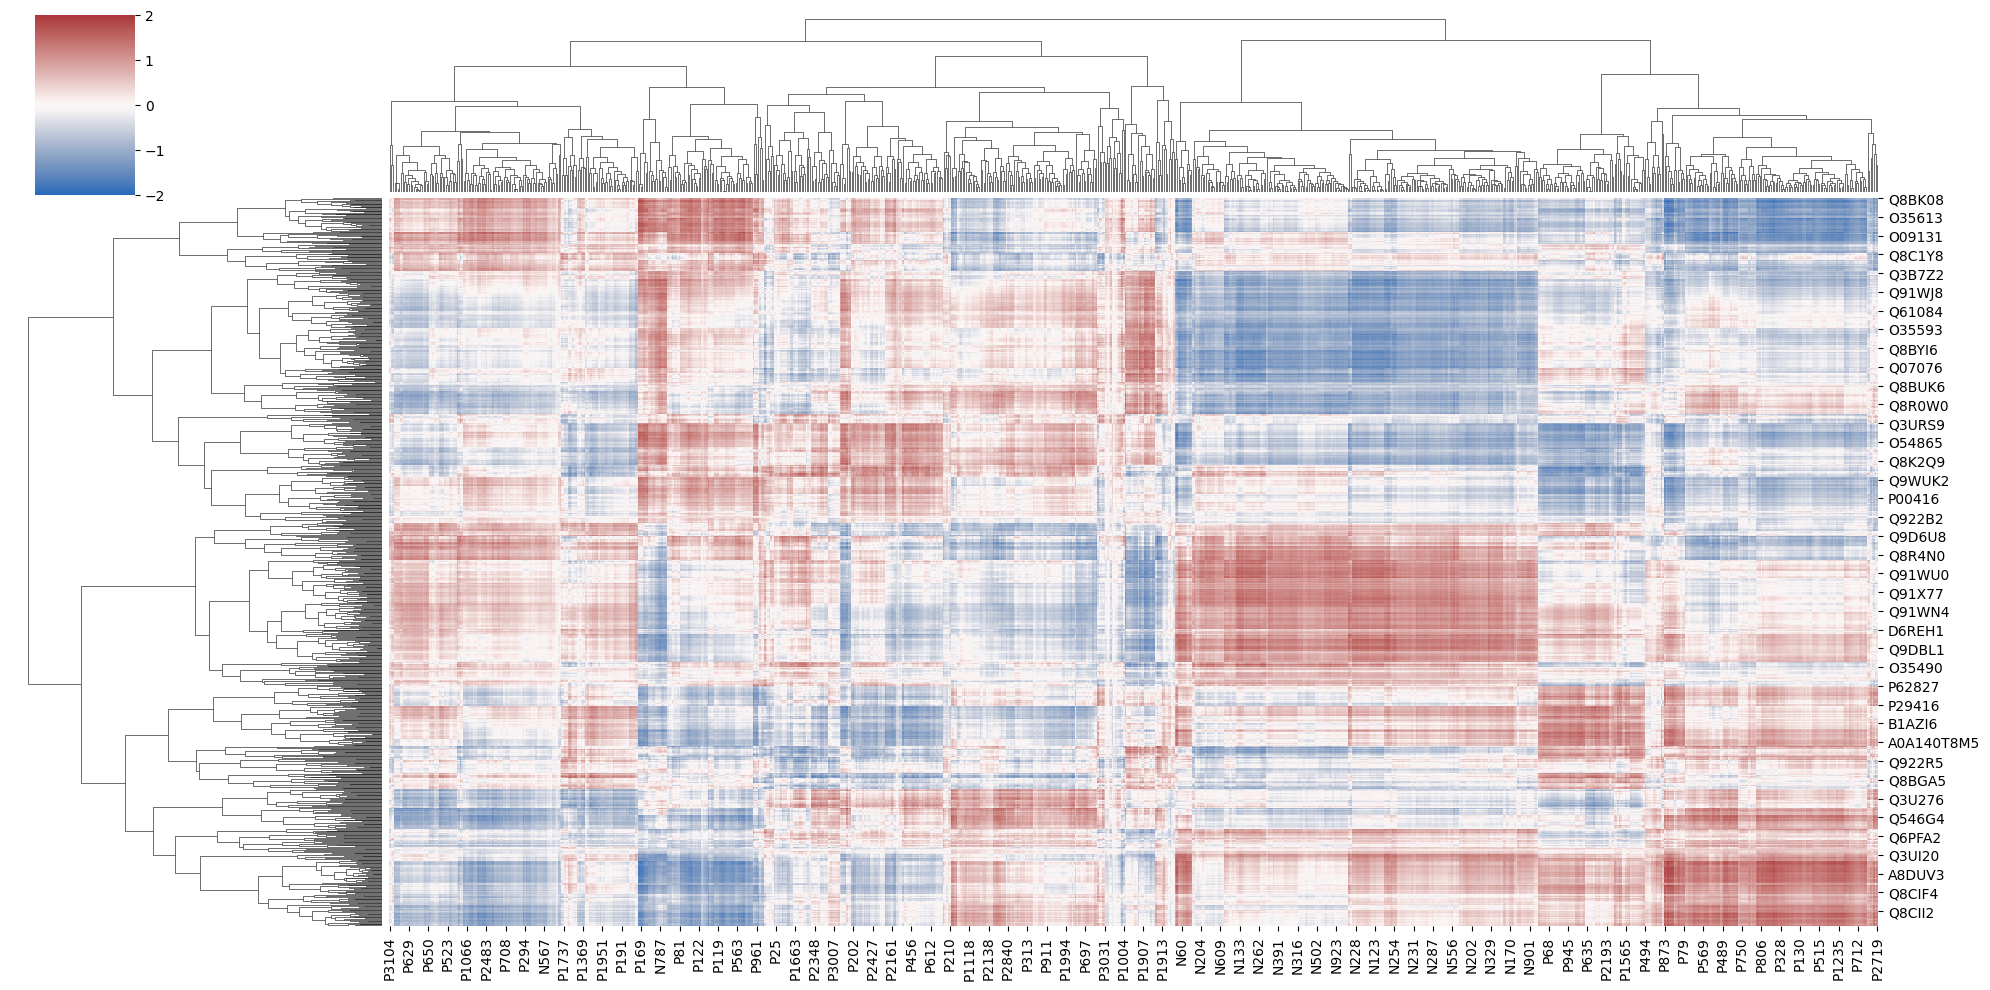

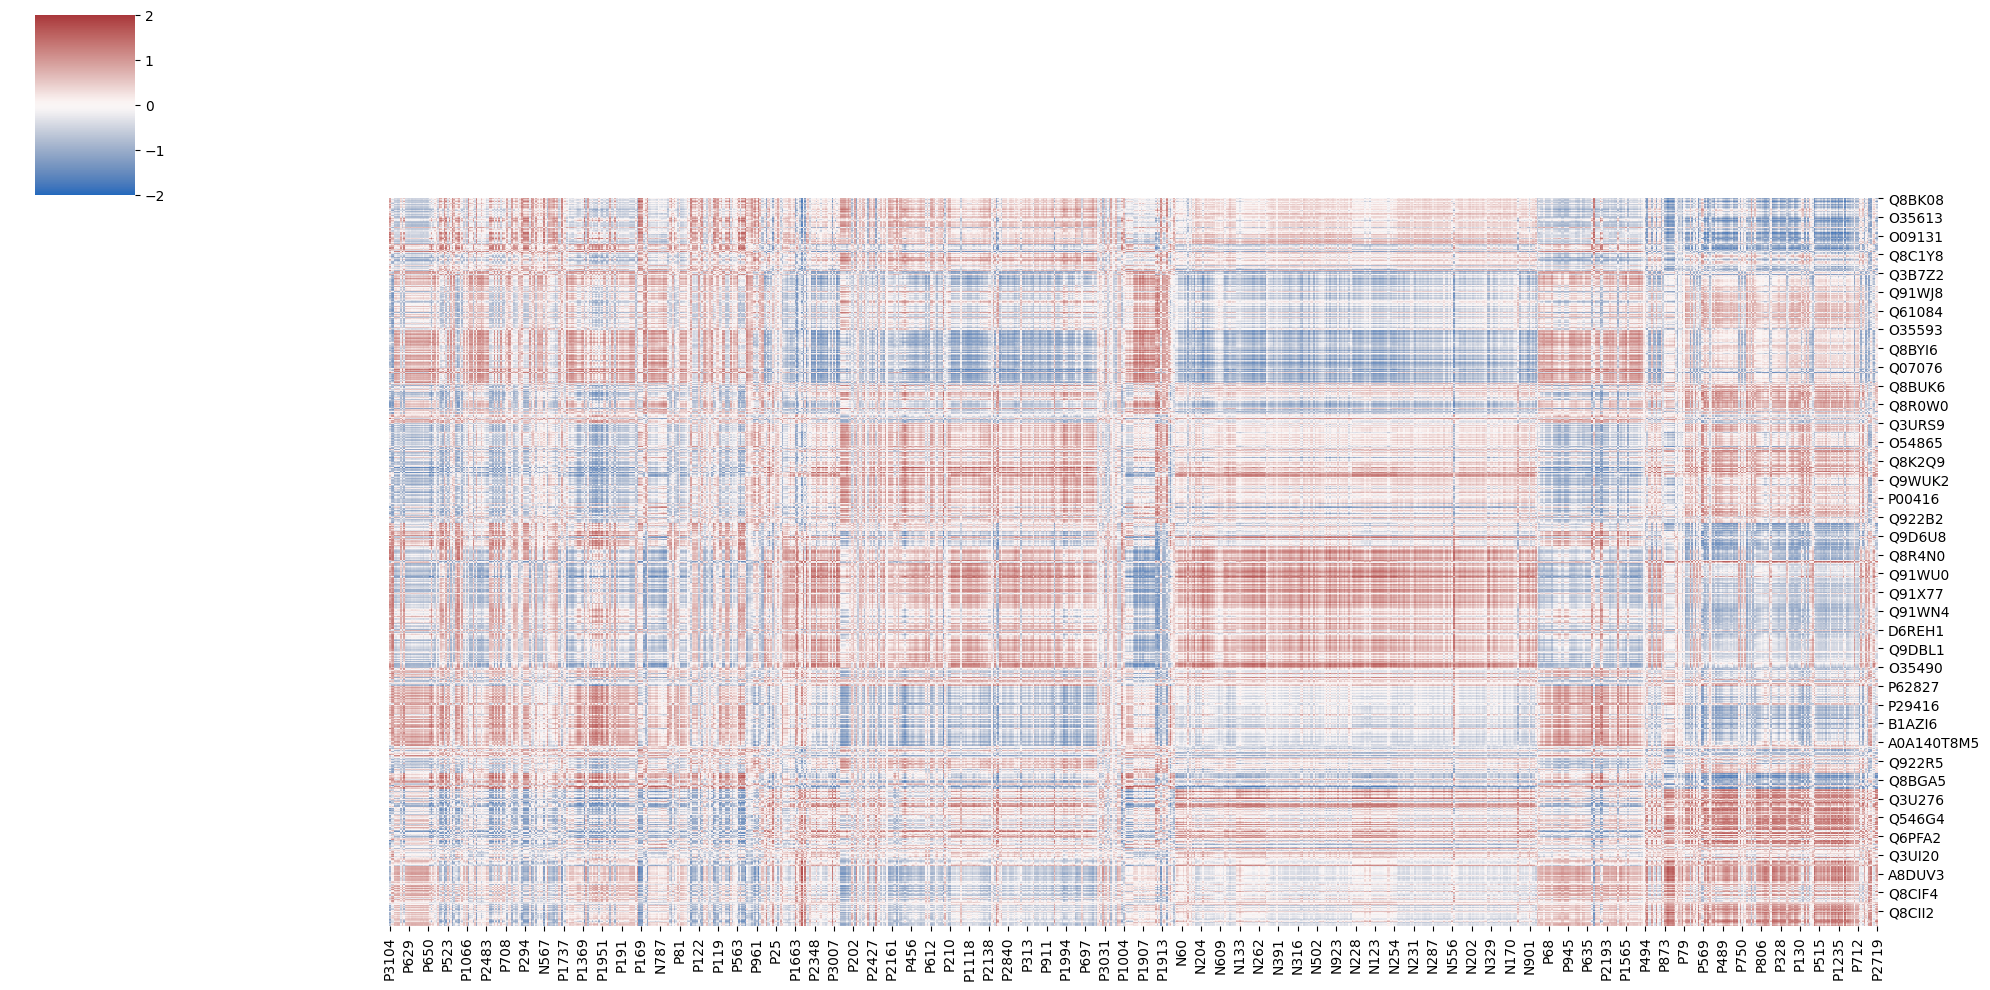

In [23]:
#
# Cluster Map
#

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.spatial as sp, scipy.cluster.hierarchy as hc


df = corr['A12_PBS'].rcca.qm.dc
hmap = sns.clustermap(
    round(df,2), cmap='vlag', annot=False, figsize=(20,10), metric='euclidean', method='average',
    vmin=-2, vmax=2)
ri = hmap.dendrogram_row.reordered_ind
ci = hmap.dendrogram_col.reordered_ind
#hmap = sns.clustermap(round(df,2), cmap='vlag', annot=False, figsize=(20,10), metric='euclidean', method='average', row_cluster=False, col_cluster=False)


df = corr['A12_B1-8'].rcca.qm.dc
hmap = sns.clustermap(round(df.iloc[ri, ci],2), 
    cmap='vlag', annot=False, figsize=(20,10), metric='euclidean', method='average', 
    row_cluster=False, col_cluster=False,vmin=-2, vmax=2)

# df = corr['B1-8_PBS'].rcca.qm.dc
# hmap = sns.clustermap(round(df.iloc[ri, ci],2), cmap='vlag', annot=False, figsize=(20,10), metric='euclidean', 
#     method='average', row_cluster=False, col_cluster=False, vmin=-2, vmax=2)

# df = corr['A12_PBS'].psk.qm.dc
# hmap = sns.clustermap(round(df,2), cmap='vlag', annot=False, figsize=(20,10), metric='euclidean', method='average')